Plik dane6.csv zawiera zbiór danych pochodzących z serwisu Twitter.
Każdy wiersz w pliku reprezentuje jeden tweet, a kolumny opisują i samą treść tweeta, i informacje o użytkowniku, który go opublikował, a także podstawowe statystyki interakcji.

Zbiór ma charakter tekstowo-liczbowy i nadaje się do:

eksploracyjnej analizy danych,

analizy aktywności użytkowników,

przetwarzania języka naturalnego (NLP),

wizualizacji danych w czasie.

**Jak czytać dane – ogólna struktura**

Dane można podzielić na cztery logiczne grupy:

*   Informacje o tweecie (kiedy, co, w jakiej formie)
*   Statystyki popularności (reakcje użytkowników)
*   Relacje między tweetami (odpowiedzi, cytowania)
*   Informacje o autorze tweeta

1. Informacje o tweecie

Najważniejsze kolumny z tej grupy to:

**id** - Unikalny identyfikator tweeta. Pozwala jednoznacznie rozróżnić każdy wpis.

**created_at** - Data i godzina publikacji tweeta. Dzięki niej możemy sprawdzić

- aktywności w czasie,

- dni tygodnia,

- trendów czasowych.

**text** - Treść tweeta. Jest to najważniejsza kolumna do analizy językowej (NLP), np.:
- rozpoznawania osób, miejsc i organizacji,
- analizy częstotliwości słów,
- analizy sentymentu.

**lang** - Język tweeta (np. pl). Pomaga dobrać odpowiednie narzędzia NLP.

2. Statystyki interakcji (popularność)

Te kolumny opisują, jak użytkownicy reagowali na tweeta:

**favorite_count** - Liczba polubień tweeta.

**retweet_count** - Liczba retweetów.

Są to dane liczbowe, które:

- pozwalają wyłonić najpopularniejsze tweety,

- mają zwykle rozkład nierównomierny (wiele tweetów ma mało reakcji, a kilka bardzo dużo),

- świetnie nadają się do rankingów typu Top 5.

3. Informacje o charakterze tweeta

Te kolumny mówią, jakiego typu jest dany tweet:

**possibly_sensitive** - Informacja, czy tweet został oznaczony jako potencjalnie wrażliwy.
Pozwala filtrować treści i analizować tylko „bezpieczne” wpisy.

**in_reply_to_user_id, in_reply_to_status_id**
Jeśli te pola są uzupełnione, oznacza to, że tweet jest odpowiedzią na inny tweet.

**quote_id**
Jeśli występuje, oznacza tweet cytujący inny wpis.

Dzięki tym kolumnom można rozróżnić:

- tweety oryginalne,

- odpowiedzi,

- cytaty.

4. Informacje o użytkowniku (autorze)

Kolumny zaczynające się od user_ opisują konto autora tweeta:

**user_id**
Unikalny identyfikator użytkownika.

**user_name, user_screen_name**
Nazwa wyświetlana i nazwa użytkownika.

**user_created_at**
Data założenia konta.
Pozwala:

- znaleźć najstarsze konto w zbiorze,

- porównywać „staż” użytkowników.

**user_followers_count**
Liczba obserwujących użytkownika.
Jedna z kluczowych miar wpływu użytkownika.

**user_verified**
Informacja, czy konto jest zweryfikowane.

Te dane umożliwiają analizę:

- wpływu popularności autora na popularność tweetów,

- różnic między kontami zweryfikowanymi i niezweryfikowanymi.

**Co jest najważniejsze w tym zbiorze danych?**

Najistotniejsze elementy datasetu to:

- kolumna text – podstawa analizy językowej,

- kolumny favorite_count i retweet_count – mierniki popularności,

- created_at – analiza czasu i aktywności,

- user_followers_count i user_verified – charakterystyka autorów,

- possibly_sensitive – filtrowanie treści.


In [ ]:
import pandas as pd
df = pd.read_csv("./dane6.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1 non-null      object 
 1   created_at                  1396 non-null   object 
 2   hashtags                    343 non-null    object 
 3   media                       81 non-null     object 
 4   urls                        354 non-null    object 
 5   favorite_count              1396 non-null   int64  
 6   id                          1396 non-null   int64  
 7   in_reply_to_screen_name     276 non-null    object 
 8   in_reply_to_status_id       276 non-null    float64
 9   in_reply_to_user_id         276 non-null    float64
 10  lang                        1396 non-null   object 
 11  place                       7 non-null      object 
 12  possibly_sensitive          387 non-null    object 
 13  quote_id                    90 no

In [29]:
dni_map = {
    "Mon": "poniedziałek",
    "Tue": "wtorek",
    "Wed": "środa",
    "Thu": "czwartek",
    "Fri": "piątek",
    "Sat": "sobota",
    "Sun": "niedziela",
}

df["created_at_day_pl"] = (
    df["created_at"]
    .astype(str)
    .str.slice(0, 3)
    .map(dni_map)
)
mies_map = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}
df["user_created_at_month_num"] = (
    df["user_created_at"]
    .astype(str)
    .str.split()
    .str[1]
    .map(mies_map)
)

tweet_urls = df["tweet_url"].dropna().tolist()

import re
url_pattern = re.compile(r"https?://\S+")

all_text_urls = []
for txt in df["text"].dropna():
    all_text_urls.extend(url_pattern.findall(txt))

image_urls = [u for u in all_text_urls if "pbs.twimg.com" in u or "/photo/" in u]

stopwords_pl = {
    "i","a","o","u","w","we","z","ze","na","do","od","po","pod","nad",
    "że","to","jest","są","by","być","jak","co","nie","tak","za","dla",
    "oraz","te","ten","ta","to","jego","jej","ich","mi","ci","się"
}

def remove_stopwords(text):
    if pd.isna(text):
        return ""
    words = re.findall(r"\w+", text.lower())
    return " ".join(w for w in words if w not in stopwords_pl)

df["text_without_stopwords"] = df["text"].apply(remove_stopwords)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1 non-null      object 
 1   created_at                  1396 non-null   object 
 2   hashtags                    343 non-null    object 
 3   media                       81 non-null     object 
 4   urls                        354 non-null    object 
 5   favorite_count              1396 non-null   int64  
 6   id                          1396 non-null   int64  
 7   in_reply_to_screen_name     276 non-null    object 
 8   in_reply_to_status_id       276 non-null    float64
 9   in_reply_to_user_id         276 non-null    float64
 10  lang                        1396 non-null   object 
 11  place                       7 non-null      object 
 12  possibly_sensitive          387 non-null    object 
 13  quote_id                    90 no

In [34]:
top5_likes = df.nlargest(5, "favorite_count")
top5_likes[["text", "favorite_count"]]

,text,favorite_count
160,"A więc jeśli się nie zaszczepimy, to wszyscy u...",705
137,Wielki sukces polskiego sportu: p.Jan-Krzyszto...,383
316,A mnie ciekawi @Straz_Graniczna jak można niel...,291
954,@kroplewina Ukraina robisz to dobrze. Zajebist...,290
1296,Niemcy najpierw wrzuciły Białoruś w ręce Putin...,201


In [35]:
top5_retweets = df.nlargest(5, "retweet_count")
top5_retweets[["text", "retweet_count"]]

,text,retweet_count
1,"A więc jeśli się nie zaszczepimy, to wszyscy u...",129
3,"A więc jeśli się nie zaszczepimy, to wszyscy u...",129
4,"A więc jeśli się nie zaszczepimy, to wszyscy u...",129
6,"A więc jeśli się nie zaszczepimy, to wszyscy u...",129
7,"A więc jeśli się nie zaszczepimy, to wszyscy u...",129


In [41]:
safe_tweets = df[df["possibly_sensitive_clean"] == False]
safe_tweets[["text", "possibly_sensitive_clean"]].head()

,text,possibly_sensitive_clean
0,@tomo9000p @SilverMarketFan @ESPI_Operator @sy...,False
1,"A więc jeśli się nie zaszczepimy, to wszyscy u...",False
2,@lukasz_nd To są spekulacje wbrew faktom. Bo ź...,False
3,"A więc jeśli się nie zaszczepimy, to wszyscy u...",False
4,"A więc jeśli się nie zaszczepimy, to wszyscy u...",False


In [42]:
earliest_date = df["user_created_at"].min()
earliest_date

'Fri Apr 02 12:05:18 +0000 2021'

In [43]:
oldest_user_tweets = df[df["user_created_at"] == earliest_date]
oldest_user_tweets[["user_screen_name", "user_created_at", "text"]]

,user_screen_name,user_created_at,text
183,rodryg26a,Fri Apr 02 12:05:18 +0000 2021,A mnie ciekawi @Straz_Graniczna jak można niel...


In [44]:
max_followers = df["user_followers_count"].max()
max_followers

1913279

In [45]:
top_followers_tweets = df[df["user_followers_count"] == max_followers]
top_followers_tweets[["user_screen_name", "user_followers_count", "text"]]

,user_screen_name,user_followers_count,text
482,tvn24,1913279,Ukraińska policja bada przyczyny śmierci biało...
717,tvn24,1913279,#PILNE | W parku w Kijowie znaleziono ciało bi...
1189,tvn24,1913279,Nowe ustalenia śledczych po katastrofie na zac...


In [47]:
verified_users = df[df["user_verified"] == True]
verified_users[["user_screen_name", "user_verified", "text"]].head()

,user_screen_name,user_verified,text
58,UkrinformP,True,Ukraina wyemituje obligacje na sumę 20 mld w r...
137,JkmMikke,True,Wielki sukces polskiego sportu: p.Jan-Krzyszto...
166,forsalpl,True,"Ukraina głowi się, co zrobić z szarą strefą go..."
171,tomaszewskim,True,"""Każdy Białorusin, który może stać się celem p..."
235,BacaPogorzelska,True,Ukraina będzie dążyć do wpisania kwestii okupo...


In [48]:
verified_users.shape[0]

50

In [49]:
day_counts = df["created_at_day_pl"].value_counts()
day_counts

,count
created_at_day_pl,
czwartek,376
środa,302
wtorek,288
piątek,136
sobota,114
poniedziałek,92
niedziela,88


In [50]:
most_common_day = day_counts.idxmax()
most_common_day

'czwartek'

In [54]:
import spacy
import pandas as pd


In [55]:
nlp = spacy.load("pl_core_news_sm")

In [59]:
def extract_entities(text):
    if pd.isna(text):
        return [], [], []

    doc = nlp(text)

    persons = []
    places = []
    organizations = []

    for ent in doc.ents:
        if ent.label_ == "persName":
            persons.append(ent.text)
        elif ent.label_ == "placeName":
            places.append(ent.text)
        elif ent.label_ == "orgName":
            organizations.append(ent.text)

    return persons, places, organizations

In [61]:
df[["persons", "places", "organizations"]] = (
    df["text"]
    .apply(lambda x: pd.Series(extract_entities(x)))
)
df[["text", "persons", "places", "organizations"]].head(10)

,text,persons,places,organizations
0,@tomo9000p @SilverMarketFan @ESPI_Operator @sy...,[],[],[Ukraina]
1,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]
2,@lukasz_nd To są spekulacje wbrew faktom. Bo ź...,[],"[Ukrainy, Ukraina]","[Waszyngton, Moskwa]"
3,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]
4,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]
5,@vonfishura @sport_tvppl ukraina gdzie w tej k...,[],[],[@vonfishura @sport_tvppl]
6,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]
7,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]
8,"@KKazmierczakK Tyle, że Ukraina nie poszła w ""...",[],"[rosyjskie, Ukrainy]",[Ukraina]
9,"A więc jeśli się nie zaszczepimy, to wszyscy u...",[Tajlanda],"[Ukraina, Egipt, Afganistan]",[]


In [64]:
day_counts = df["created_at_day_pl"].value_counts()
day_counts

days_order = [
    "poniedziałek",
    "wtorek",
    "środa",
    "czwartek",
    "piątek",
    "sobota",
    "niedziela"
]

day_counts = day_counts.reindex(days_order)


In [65]:
import matplotlib.pyplot as plt

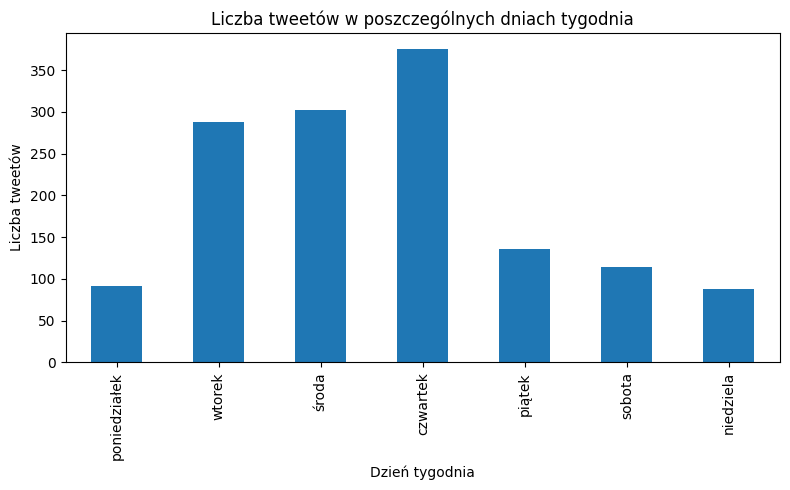

In [66]:
plt.figure(figsize=(8, 5))
day_counts.plot(kind="bar")
plt.title("Liczba tweetów w poszczególnych dniach tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.tight_layout()
plt.show()